# Ejercicio de programación Regresión Lineal Multiple

### repositorio
Soria Franz
https://github.com/FranzDS01/InteligenciaArtifical/blob/main/Laboratorios/lab07/Regresion_lineal_multiple.ipynb

In [1]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np
import pandas as pd
# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [2]:
data = np.loadtxt('../Datasets/Cellphone.csv', delimiter=',', skiprows=1)
y = data[:, 1]
X = data[:,2:]
m = y.size

In [3]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [4]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

Despues de `featureNormalize` la funcion es provada, se añade el temino de interseccion a `X_norm`:

In [5]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [6]:
print(X)

[[ 1.00000000e+00 -3.96590165e-01 -3.82572418e-01 ...  8.07867811e-01
  -1.70327419e-01 -6.96210988e-01]
 [ 1.00000000e+00 -3.96590165e-01 -4.90564141e-01 ... -1.04032711e+00
  -8.38100234e-01  4.47564206e-01]
 [ 1.00000000e+00 -3.96590165e-01 -6.52551726e-01 ...  1.14794716e-01
  -6.17955350e-01 -6.04708972e-01]
 ...
 [ 1.00000000e+00  5.31034658e+00 -2.20584833e-01 ...  3.58016019e+00
   1.15860931e-01 -9.70717034e-01]
 [ 1.00000000e+00  5.39920331e+00 -4.60138647e-03 ...  8.07867811e-01
   4.09387443e-01 -4.67455949e-01]
 [ 1.00000000e+00  5.95763864e+00  3.40972128e-01 ...  2.65606273e+00
  -1.04283953e-01 -2.38700910e-01]]


In [7]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    J = 0
    
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    
    return J


In [8]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    
    # Inicializa algunos valores 
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
        
    return theta, J_history

#### 3.2.1 Seleccionando coheficientes de aprendizaje


theta calculado por el descenso por el gradiente: [2215.32407546  -40.2691789   -52.59373734  -50.82475113  136.08832064
  132.26805509   68.69552584  186.48088608  167.46526239   31.156474
   40.43086463  126.63433701 -139.02692543]
El precio de un movil con estas caracteristicas seria : $3036


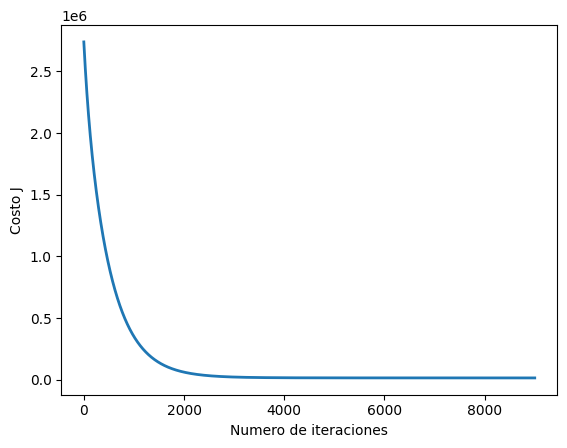

In [9]:

alpha = 0.001 # alpha 0.001 mejor valor
num_iters = 9000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(13)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))
#Estimar el precio para de un celular
#precio,ventas,peso,resolucion,pixeles,CPU,Frecuencia,Memoria,RAM,Camara trasera, Camara frontal,bateria,espesor
#10     135       5     424       8       1      16       3      13       8    2610       7      2357
ventas=10
peso=135
resolucion=5
pixeles=424
CPU=8
Frecuencia=1
Memoria=16
Ram=3
Camara_t=13
Camara_f=8
bateria=2610
espesor=0.7
X_array = [1, ventas, peso, resolucion, pixeles, CPU, Frecuencia,Memoria, Ram,Camara_t,Camara_f,bateria,espesor]
X_array[1:] = (X_array[1:] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto
print('El precio de un movil con estas caracteristicas seria : ${:.0f}'.format(price))

<a id="section7"></a>
### 2.3 Ecuacion de la Normal

Una manera de calcular rapidamente el modelo de una regresion lineal es:

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Utilizando esta formula no requiere que se escale ninguna caracteristica, y se obtendra una solucion exacta con un solo calculo: no hay “bucles de convergencia” como en el descenso por el gradiente. 

Primero se recargan los datos para garantizar que las variables no esten modificadas. Recordar que no es necesario escalar las caracteristicas, se debe agregar la columna de unos a la matriz $X$ para tener el termino de intersección($\theta_0$). 

In [10]:
data = np.loadtxt('../Datasets/Cellphone.csv', delimiter=',', skiprows=1)
y = data[:, 1]
X = data[:, 2:]
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [11]:
def normalEqn(X, y):
  
    theta = np.zeros(X.shape[1])
    
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    
    return theta

In [12]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [1, ventas, peso, resolucion, pixeles, CPU, Frecuencia,
           Memoria, Ram, Camara_t, Camara_f, bateria, espesor]
price = np.dot(X_array, theta) 

print('prediccion del precio del movil con la caracteristicas especificadas: ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 1.74955093e+03 -2.27466762e-02 -3.79634036e-01 -7.75920306e+01
  1.00571813e+00  5.39808906e+01  1.31891648e+02  6.24992624e+00
  9.32031847e+01  5.04528682e+00  8.96839734e+00  1.25890285e-01
 -7.36888218e+01]
prediccion del precio del movil con la caracteristicas especificadas: $3094
